In [1]:
# 1147 Assignment 3

In [2]:
# 1.1 Import the data and create the anchor date columns

In [3]:
# 1. Import the dataset as txn and identify the number of rows

In [1]:
import pandas as pd
txn = pd.read_csv('/Users/chelseali/Desktop/Retail_Data_Transactions.csv')
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [2]:
txn.shape[0]
# There are 125000 rows in dataset

125000

In [3]:
# The date-format in column ’trans date’ is not standard. Create a new column ’txn_date’
# from ’trans_date’ with pd.to datetime and drop the column ’trans_date’.

In [4]:
# Create a new column called 'txn_date'
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
# Drop the column ’trans_date’
txn.drop('trans_date',inplace=True, axis = 1)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


In [8]:
# Identify the min() and max() of column ’txn date’.

In [5]:
txn['txn_date'].min()
# Min is '2011-05-16 00:00:00'

Timestamp('2011-05-16 00:00:00')

In [6]:
txn['txn_date'].max()
# Max is '2015-03-16 00:00:00'

Timestamp('2015-03-16 00:00:00')

In [7]:
# 4. Create the column ’ME_DT’: the last day of the month in the ’trans_date’ column.
# DateOffset objects is a simple way to do this in pandas.

In [8]:
from pandas.tseries.offsets import MonthEnd
txn['ME_DT'] = txn['txn_date'] + MonthEnd(0) 
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


In [9]:
# 5. Create the column ’YEAR’: the year in the ’trans_date’ column. 
# DatetimeIndex with attribute .year will help you do so.

In [10]:
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013


In [11]:
# 1.2 Create features that capture annual spending

In [12]:
# Using groupby and NamedAgg create clnt_annual_aggregations,
# the annual aggregations dataframe: 
# with sum, mean, std, var, sem, max, min, count as the aggregation functions. 

In [13]:
clnt_annual_aggregations = txn.groupby(["customer_id",'YEAR']).agg(ann_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
    ann_txn_amt_ave = pd.NamedAgg('tran_amount','mean'), ann_txn_amt_std = pd.NamedAgg('tran_amount','std'),
    ann_txn_amt_var = pd.NamedAgg('tran_amount','var'), ann_txn_amt_sem = pd.NamedAgg('tran_amount','sem'),
    ann_txn_amt_max = pd.NamedAgg('tran_amount','max'), ann_txn_amt_min = pd.NamedAgg('tran_amount','min'),
    ann_txn_amt_cnt = pd.NamedAgg('tran_amount','count') )
clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1

In [14]:
# 2. Plot the histogram of the sum and count.

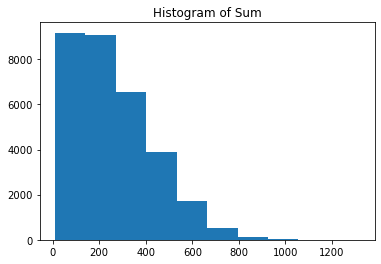

In [15]:
import matplotlib.pyplot as plt
plt.hist(clnt_annual_aggregations['ann_txn_amt_sum'])
plt.title("Histogram of Sum")
plt.show()

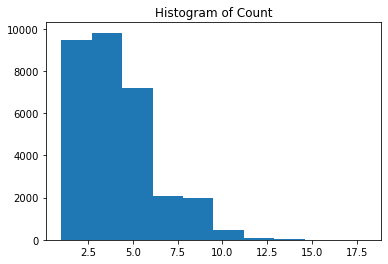

In [16]:
plt.hist(clnt_annual_aggregations['ann_txn_amt_cnt'])
plt.title("Histogram of Count")
plt.show()

In [17]:
# Reset the index and reshape the table with the pivot table function to create the
# clnt annual aggregations pivot table shown below with 40 columns (why 40?).

In [18]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(columns='YEAR',index='customer_id').fillna(0)
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  

[5 rows x 40 columns]

In [19]:
# There are 5 columns called annual_sum, annual_mean, annual_std, annual_var,
# annual_sem, annual_max, annual_min, annual_coun in dataframe of clnt_annual_aggregations.
# After pivoting it, 40 columns are shown in clnt_annual_aggregations_pivot.
# Since there are 5 years of each aggregated feature / 8 x 5 = 40.

In [20]:
# You should expect columns with NaN values. 
# Impute the NaN entries when you perform the pivot table function and explain your choice of values.

In [21]:
# I replace every Nan entry with 0, which can stand that this customer
# does not transact in one particular year.

In [22]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [23]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

In [24]:
# What are your observations regarding the number of levels and the column names?
# There are two levels of columns in clnt_annual_aggregations_pivot.
# The first column is about 8 aggregation features.
# The second column is about 5 years.
# The code of column names above shows us that there are 40 permutations of featurs and years.
# Every feature name corresponds to 5 different years (5 times).
# Help explain why clnt annual aggregations pivot table shown below with 40 columns in q2.

In [25]:
# 5. Finally, you want to save the dataframe clnt annual aggregations pivot as an.xlsx file 
# for future use in the machine learning assignment. 

In [26]:
# To do so, you want to remove the two levels in columns and create a single level with column names:
# ’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. 
# To do so, use the code snippetbelow prior to saving the dataframe as an Excel file.

In [27]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


In [28]:
# Describe what each line of code in the box does

In [29]:
# level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str):
# Extract the first level of columns: feature names,such as ann_txn_amt_ave, ann_txn_amt_cnt.
# level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str):
# Extract the second level of columns: years, such as 2011, 2012.

In [30]:
# Save the output dataframe as an Excel file annual features.xlsx.

In [31]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

In [32]:
# 6. What are the possible disadvantages in capturing client transaction behavior with the
# annual features described in this section (if any)?

In [33]:
# I think that method annual data is too simple, which may lose some information.
# For example, customer A might has lots of transactions in some pariticular month or quarter.
# To be more specific, we can build a dataframe with feature names and months.

In [34]:
# 1.3 Create monthly aggregations

In [35]:
# 1. Create the dataframe that captures the monthly sum and count of transactions per client
# (name it clnt monthly aggregations). 
# Use the groupby function with the Named Aggregation feature 

In [36]:
clnt_monthly_aggregations = txn.groupby(["customer_id",'ME_DT']).agg(mth_txn_amt_sum = pd.NamedAgg('tran_amount','sum'),
                                                                     mth_txn_cnt = pd.NamedAgg('tran_amount','count'))
clnt_monthly_aggregations.head()

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1

In [37]:
# 2. Create a histogram of both columns you created. 

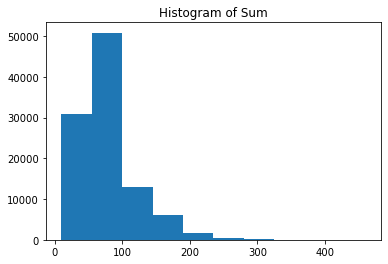

In [38]:
plt.hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
plt.title("Histogram of Sum")
plt.show()

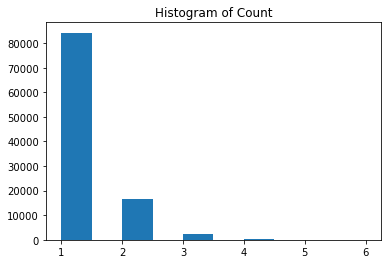

In [39]:
plt.hist(clnt_monthly_aggregations['mth_txn_cnt'])
plt.title("Histogram of Count")
plt.show()

In [40]:
# What are your observations? 

In [41]:
# Histogram of Sum:
# Most sum value monthly is less than $100.
# Histogram of Count:
# Most count value monthly is 1.
# Most people transact one time with less than $100 monthly.

In [42]:
# What are the most common and maximum values for each column?

In [46]:
clnt_monthly_aggregations['mth_txn_amt_sum'].mode()[0]
# The most common for sum is $77 monthly

77

In [47]:
clnt_monthly_aggregations['mth_txn_amt_sum'].max()
# The max value for sum is 460 monthly

460

In [48]:
clnt_monthly_aggregations['mth_txn_cnt'].mode()[0]
# The most common for count is 1 monthly

1

In [49]:
clnt_monthly_aggregations['mth_txn_cnt'].max()
# The max value for count is 6 monthly

6

In [50]:
# How do they compare with the one in section 1.2?

In [51]:
clnt_annual_aggregations['ann_txn_amt_sum'].mode()[0]
# The most common for sum is $97 yearly

97

In [52]:
clnt_annual_aggregations['ann_txn_amt_sum'].max()
# The max value for sum is $1317 yearly

1317

In [53]:
clnt_annual_aggregations['ann_txn_amt_cnt'].mode()[0]
# The most common for count is 3 yearly

3

In [54]:
clnt_annual_aggregations['ann_txn_amt_cnt'].max()
# The max value for count is 18 yearly

18

In [55]:
# What we get from section 2 is more general, since the data covers the whole year.
# I can read more information specific from section 1.3 than 1.2

In [56]:
# 1.4 Create the base table for the rolling window features

In [57]:
# 1. Create the numpy array of the unique elements in columns ’customer id’ and ’ME_DT’
# of the txn table you created in section 1.1. 
# Confirm that you have 6,889 unique clients and 47 unique month-end-dates.

In [58]:
clnt_no = txn['customer_id'].unique()
len(clnt_no )

6889

In [59]:
me_dt = txn['ME_DT'].unique()
len(me_dt)

47

In [60]:
# Use itertools.product to generate all the possible combinations of ’customer id’ and ’ME DT’. 

In [62]:
from itertools import product
base_table = product(clnt_no , me_dt)

In [63]:
# 3. Next, you want to convert the itertools.product object base table into a pandas 
# object called base_table_pd.
# To do so, use pd.DataFrame.from records and name the columns ’CLNT NO’ and ’ME DT’.

In [64]:
base_table_pd = pd.DataFrame.from_records(base_table,columns = ['CLNT_NO', 'ME_DT'])

In [61]:
# 4

In [62]:
# Filter client CS1112 and confirm that the dates fall between the min and max
# month-dates you identified in section 1.1

In [65]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']['ME_DT'].min()

Timestamp('2011-05-31 00:00:00')

In [66]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']['ME_DT'].max()

Timestamp('2015-03-31 00:00:00')

In [67]:
# confirm that the snapshot of client CS1112 has 47 rows, 
# one for each month in the dataset.

In [68]:
len(base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'])
# 47 rows

47

In [69]:
# Confirm that the base table pd has 323,783 rows, 
# which is the expected value of combinations for 6,889 unique clients 
# and 47 unique month-end dates.

In [70]:
base_table_pd.shape[0]
# 323,783 rows
# 6889 x 47 = 323783

323783

In [71]:
print(base_table_pd['CLNT_NO'].nunique())
print(base_table_pd['ME_DT'].nunique())

6889
47


In [72]:
# 1.5 Create the monthly rolling window features

In [73]:
# 1. Left-join the base table pd with the clnt monthly aggregations table from section 1.3 
# on [CLNT NO, ME DT] to create the table base clnt mth.

In [74]:
clnt_monthly_aggregations.index.set_names(['CLNT_NO','ME_DT'])
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations, on = ['CLNT_NO', 'ME_DT'], how = 'left')
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


In [75]:
# Why do some rows have NaN values?
# In dataset 'txn', it records clients have transactions on particular date.
# After doing product of clnt_no , me_dt, there are 323783.
# Not every client transacts in every data recorded on me_dt / date.

In [76]:
# What values will you choose to impute NaN values in the sum and count columns?
# Perform the imputation you suggest.

In [77]:
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth.head()
# I impute NaN with 0, since this client does not transcat on the data.

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0


In [78]:
# Confirm that the number of rows is what you expect. What is the value?

In [79]:
base_clnt_mth.shape[0]
# There are 323783 rows

323783

In [80]:
# How are tables base_clnt_mth and clnt_monthly_aggregations different? 
# Comment on the number of rows and the content of each table.

In [81]:
# base_clnt_mth has 323783 rows with some 0, since we product clnt_no and me_dt.
# Not every client transacts in every data recorded on me_dt / date.

In [82]:
clnt_monthly_aggregations.shape[0]
# clnt_monthly_aggregations has 103234 rows only without NaN,
# since it records transactions of every client on particular date only.

103234

In [83]:
# 2. For the next step, the calculation of the rolling window features, you need to sort the
# data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary
# to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.

In [84]:
base_clnt_mth = base_clnt_mth.sort_values(['CLNT_NO','ME_DT'],ascending = True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0


In [85]:
# 3

In [86]:
# groupby the client number
# select the two columns you want to aggregate / I choose sum and count
# use the rolling function with the appropriate windows
# aggregate with ’sum’, mean’ and ’max’

In [87]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(3).agg(['sum', 'mean', 'max'])
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [88]:
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(6).agg(['sum', 'mean', 'max'])
rolling_features_6M.head()

mth_txn_amt_sum          mth_txn_cnt         
                           sum mean max         sum mean max
CLNT_NO                                                     
CS1112  157064             NaN  NaN NaN         NaN  NaN NaN
        157058             NaN  NaN NaN         NaN  NaN NaN
        157044             NaN  NaN NaN         NaN  NaN NaN
        157069             NaN  NaN NaN         NaN  NaN NaN
        157060             NaN  NaN NaN         NaN  NaN NaN

In [89]:
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum','mth_txn_cnt']].rolling(12).agg(['sum', 'mean', 'max'])
rolling_features_12M.head()

mth_txn_amt_sum          mth_txn_cnt         
                           sum mean max         sum mean max
CLNT_NO                                                     
CS1112  157064             NaN  NaN NaN         NaN  NaN NaN
        157058             NaN  NaN NaN         NaN  NaN NaN
        157044             NaN  NaN NaN         NaN  NaN NaN
        157069             NaN  NaN NaN         NaN  NaN NaN
        157060             NaN  NaN NaN         NaN  NaN NaN

How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively?
Why do they appear?

My answer: 2, 5, 11.
2 = 3 - 1
5 = 6 - 1
11 = 12 -1
Based on the idea behind rolling window features is captured in the image,
I calculate some statistical properties (e.g. average) based on a window that is sliding.
The window is 3 which means that the last 3 points are used at every row to calculate the statistical property.
The window is 6 which means that the last 6 points are used at every row to calculate the statistical property.
The window is 12 which means that the last 12 points are used at every row to calculate the statistical property.

In [90]:
print(rolling_features_3M.index.nlevels)
print(rolling_features_6M.index.nlevels)
print(rolling_features_12M.index.nlevels)

print(rolling_features_3M.columns.nlevels)
print(rolling_features_6M.columns.nlevels)
print(rolling_features_12M.columns.nlevels)

2
2
2
2
2
2


How many levels do the index and columns have? Are these MultiIndex dataframes?

My answer: 
rolling_features_3M: index has 2 levels, columns has 2 levels.
rolling_features_6M: index has 2 levels, columns has 2 levels.
rolling_features_12M: index has 2 levels, columns has 2 levels.

In [91]:
# Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’,
# ’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same naming convention for 6M and 12M.

In [92]:
rolling_features_3M.columns = ['amt_sum_3M', 'amt_mean_3M', 'amt_max_3M', 'txn_cnt_sum_3M', 'txn_cnt_mean_3M', 'txn_cnt_max_3M']
rolling_features_3M.head()

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157058         NaN          NaN         NaN             NaN   
        157044        56.0    18.666667        56.0             1.0   
        157069       152.0    50.666667        96.0             2.0   
        157060        96.0    32.000000        96.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157058              NaN             NaN  
        157044         0.333333             1.0  
        157069         0.666667             1.0  
        157060         0.333333             1.0

In [93]:
rolling_features_6M.columns = ['amt_sum_6M', 'amt_mean_6M', 'amt_max_6M', 'txn_cnt_sum_6M', 'txn_cnt_mean_6M', 'txn_cnt_max_6M']
rolling_features_6M.head()

amt_sum_6M  amt_mean_6M  amt_max_6M  txn_cnt_sum_6M  \
CLNT_NO                                                               
CS1112  157064         NaN          NaN         NaN             NaN   
        157058         NaN          NaN         NaN             NaN   
        157044         NaN          NaN         NaN             NaN   
        157069         NaN          NaN         NaN             NaN   
        157060         NaN          NaN         NaN             NaN   

                txn_cnt_mean_6M  txn_cnt_max_6M  
CLNT_NO                                          
CS1112  157064              NaN             NaN  
        157058              NaN             NaN  
        157044              NaN             NaN  
        157069              NaN             NaN  
        157060              NaN             NaN

In [94]:
rolling_features_12M.columns = ['amt_sum_12M', 'amt_mean_12M', 'amt_max_12M', 'txn_cnt_sum_12M', 'txn_cnt_mean_12M', 'txn_cnt_max_12M']
rolling_features_12M.head()

amt_sum_12M  amt_mean_12M  amt_max_12M  txn_cnt_sum_12M  \
CLNT_NO                                                                   
CS1112  157064          NaN           NaN          NaN              NaN   
        157058          NaN           NaN          NaN              NaN   
        157044          NaN           NaN          NaN              NaN   
        157069          NaN           NaN          NaN              NaN   
        157060          NaN           NaN          NaN              NaN   

                txn_cnt_mean_12M  txn_cnt_max_12M  
CLNT_NO                                            
CS1112  157064               NaN              NaN  
        157058               NaN              NaN  
        157044               NaN              NaN  
        157069               NaN              NaN  
        157060               NaN              NaN

In [93]:
# Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M,
# rolling features 12M in the output all rolling features.
# It is recommended to drop the level:0 of the rolling features MultiIndex table and 
# join with base clnt mth on the indexes.

In [95]:
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [96]:
all_rolling_features = base_clnt_mth.join(rolling_features_3M).join(rolling_features_6M).join(rolling_features_12M)
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# 5. Confirm that your final output all rolling features has 323,783 rows and 22 columns
# and save it as mth rolling features.xlsx.

In [98]:
all_rolling_features.shape
# 323,783 rows and 22 columns

(323783, 22)

In [107]:
all_rolling_features.to_excel("mth_rolling_features.xlsx")

In [100]:
# 1.6 Date-related features: date of the week

In [101]:
# you want to use the attributes dt.dayofweek and/or dt.day name() to
# extract the day of the week from column ’txn date’ of the txn table (with Monday=0, Sunday=6). 

In [106]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn.head()

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday


In [ ]:
# 2. Create the bar plot that shows the count of transactions per day of the week.

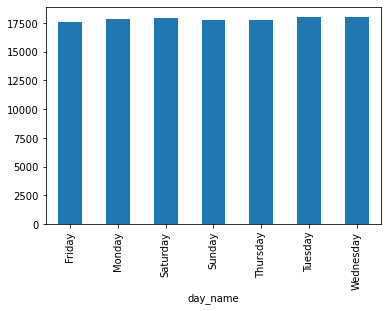

In [126]:
pd162 = txn.groupby('day_name')['customer_id']
pd162cnt = pd162.count()
pd162cnt.plot.bar()
plt.show()

In [ ]:
# Following the same logic as in section 1.2, generate the features that capture the count
# of transactions per client, year and day of the week. The intermediate MultiIndex
# dataframe (with nlevels=3) and the final pivoted output with a single index are shown
# in the snapshots below.

In [133]:
annual_day_of_week_counts = pd.DataFrame(txn.groupby(['customer_id', 'day_name', 'YEAR'])['tran_amount'].count())
annual_day_of_week_counts.columns = ['cnt']
annual_day_of_week_counts.head()

cnt
customer_id day_name YEAR     
CS1112      Friday   2011    1
                     2013    1
            Monday   2013    1
            Saturday 2012    1
            Sunday   2011    1

In [134]:
annual_day_of_week_counts_pivot = annual_day_of_week_counts.pivot_table(index = 'customer_id',columns=['YEAR','day_name']).fillna(0).astype(int)
annual_day_of_week_counts_pivot.head()

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  

[5 rows x 35 columns]

In [135]:
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0).astype(str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1).astype(str)
level_2 = annual_day_of_week_counts_pivot.columns.get_level_values(2).astype(str)

In [136]:
annual_day_of_week_counts_pivot.columns = level_0 + '_' + level_1 + '_' + level_2
annual_day_of_week_counts_pivot.head()

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
# 4 Confirm that your output has the same number of rows as the final output in section 1.2

In [142]:
annual_day_of_week_counts_pivot.shape[0]

6889

In [141]:
# In sec 1.2
clnt_annual_aggregations_pivot.shape[0]

6889

In [ ]:
# and save it as annual day of week counts pivot.xlsx. 

In [ ]:
annual_day_of_week_counts_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

In [143]:
# How many features/columns did you create in this section?

In [144]:
annual_day_of_week_counts_pivot.shape[1]
# 35 columns

35

In [145]:
# 5. Similarly, generate the features that capture the count of transactions per client,
# month-end-date and day of the week. In contrast with the annual pivot table in
# the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as
# index to obtain the following output dataframe.

In [151]:
last_day = pd.DataFrame(txn.groupby(["customer_id" ,"ME_DT","day_name"]).count()["tran_amount"])
last_day.columns = ["cnt"]
last_day.head()

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1

In [153]:
last_day_pivot = last_day.pivot_table(index=['customer_id','ME_DT'],columns=["day_name"]).fillna(0).astype(int)
level_0 = last_day_pivot.columns.get_level_values(0).astype(str)
level_1 = last_day_pivot.columns.get_level_values(1).astype(str)
last_day_pivot.columns = level_0 + '_' + level_1
last_day_pivot.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

In [154]:
# 6. Join with base table pd as you did in section 1.5 and impute with your choice of
# value for NaN. Save the final output as mth day counts.xlxs.

In [157]:
mth_day_counts = base_table_pd.join(last_day_counts_pivot, on=['CLNT_NO','ME_DT'], how='left')
mth_day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
mth_day_counts = mth_day_counts.fillna(0)
mth_day_counts.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
mth_day_counts.to_excel("mth_day_counts.xlsx")

In [161]:
# 1.7 Date-related features: days since last transaction

In [163]:
# 1. The starting point is again the txn table. Recall that most clients have a single
# purchase per month, but some clients have multiple purchases in a month. Since
# you want to calculate the ”days since last transaction”, you want to capture the last
# transaction in a month for every client.
# Use the appropriate groupby to create the table last monthly purchase that cap-
# tures the last ’txn date’ (aggfunc=max) for every client and month.

In [165]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(last_monthly_purchase = pd.NamedAgg('txn_date','max'))
last_monthly_purchase.head()

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24

In [166]:
# 2. Join base table pd with last monthly purchase as you did in section 1.5.

In [168]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO', 'ME_DT'], how = 'left')
last_monthly_purchase_base.sort_values(['CLNT_NO','ME_DT'], ascending = True, inplace = True)
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT


In [169]:
# What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.

I impute the NaT values with the last entry of it in last_monthly_purchase column. 
Since last_monthly_purchase column shows the date of last purchase in the same month of ME_DT of same row.

In [171]:
# 3
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,2011-06-15
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,2011-08-19


In [ ]:
# 4. Subtract the two date columns and convert the output to .dt.days to calculate the
# column ’days since last txn’ as shown in the following snapshot.

In [181]:
last_monthly_purchase_base['days_since_last_txn'] = (last_monthly_purchase_base['ME_DT'] - last_monthly_purchase_base['last_monthly_purchase']).dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


In [ ]:
# 5. Plot a histogram of the ’days since last txn’.

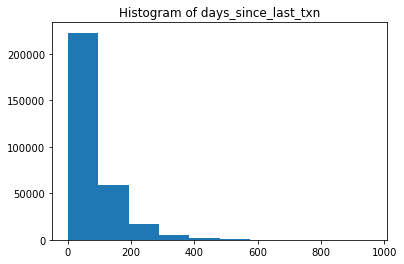

In [177]:
plt.hist(last_monthly_purchase_base['days_since_last_txn'])
plt.title("Histogram of days_since_last_txn")
plt.show()

In [ ]:
# Based on the values you observe in the histogram, impute the remaining NaN values (i.e. for the initial months before a client
# makes a purchase). 

In [ ]:
# There is only one row with NaT in last_monthly_purchase_base, which is the first row.
# We do not know any information before 2011-05-31 / min of data.
# I will replace NaT with 0.

In [183]:
last_monthly_purchase_base = last_monthly_purchase_base.fillna(0)
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,0,0.0
157058,CS1112,2011-06-30,2011-06-15 00:00:00,15.0
157044,CS1112,2011-07-31,2011-06-15 00:00:00,46.0
157069,CS1112,2011-08-31,2011-08-19 00:00:00,12.0
157060,CS1112,2011-09-30,2011-08-19 00:00:00,42.0


In [ ]:
# Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as days since last txn.xlsx.

In [184]:
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel("days_since_last_txn.xlsx")